In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [86]:
columns=['customer_id', 'age','seconds_to_successful_login', 'total_attempt']

df = pd.read_csv('/content/gdrive/MyDrive/dataset_login1.csv', skipinitialspace=True, usecols=columns)
# See the keys
df

,customer_id,age,seconds_to_successful_login,total_attempt
0,1U0HMQT6,53,39.866981,3
1,1HMKY390,54,38.215829,3
2,HLBCUC66,24,15.492001,1
3,F6GDBQ53,42,17.139451,1
4,1ZU0WDY0,64,38.083179,1
...,...,...,...,...
19995,9R2BWT0J,51,40.166523,1
19996,W3JCEYM7,39,26.325768,2
19997,5KM217ZY,46,46.301879,2
19998,PR67NZ3W,30,39.088293,2


In [60]:
#df=pd.read_csv('/content/gdrive/MyDrive/dataset_login1.csv')
#udf = pd.DataFrame(df, columns=['customer_id', 'age','seconds_to_successful_login', 'total_attempt'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  20000 non-null  object 
 1   age                          20000 non-null  int64  
 2   seconds_to_successful_login  20000 non-null  float64
 3   total_attempt                20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB


In [88]:
df.describe()

,age,seconds_to_successful_login,total_attempt
count,20000.000000,20000.000000,20000.000000
mean,39.781100,37.269752,2.247400
std,46.509835,14.807582,1.152285
min,13.000000,1.000000,1.000000
25%,28.000000,27.159416,1.000000
50%,36.000000,36.035275,2.000000
75%,48.000000,46.322701,3.000000
max,2021.000000,121.158802,14.000000


In [89]:
filter = df["age"]>=18 
filter2 = df["age"]<=30 
  
# filtering data on basis of both filters
df.where(filter & filter2, inplace = True)
df_age = df[~df['age'].isnull()]
df_age

,customer_id,age,seconds_to_successful_login,total_attempt
2,HLBCUC66,24.0,15.492001,1.0
7,P7XU880X,20.0,32.934100,2.0
8,FPW7LKWP,28.0,20.481295,3.0
10,JJDYB0Y3,24.0,18.717586,1.0
11,XPQ9EUJQ,26.0,25.593334,1.0
...,...,...,...,...
19991,T0JM0900,18.0,33.426071,1.0
19992,HYGE7K90,25.0,30.465705,2.0
19993,HV77PK50,29.0,20.024349,2.0
19998,PR67NZ3W,30.0,39.088293,2.0


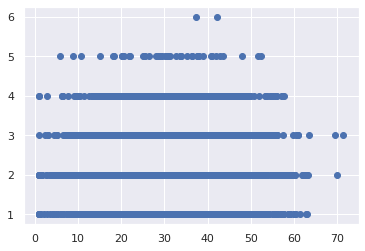

In [90]:
plt.scatter(df_age['seconds_to_successful_login'],df_age['total_attempt'])

plt.show()


In [91]:
x = df_age.iloc[:,1:5] 
x

,age,seconds_to_successful_login,total_attempt
2,24.0,15.492001,1.0
7,20.0,32.934100,2.0
8,28.0,20.481295,3.0
10,24.0,18.717586,1.0
11,26.0,25.593334,1.0
...,...,...,...
19991,18.0,33.426071,1.0
19992,25.0,30.465705,2.0
19993,29.0,20.024349,2.0
19998,30.0,39.088293,2.0


In [92]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [93]:
indentified_clusters = kmeans.fit_predict(x)

In [94]:
data_with_clusters = df_age.copy()
data_with_clusters['Clusters'] = indentified_clusters 

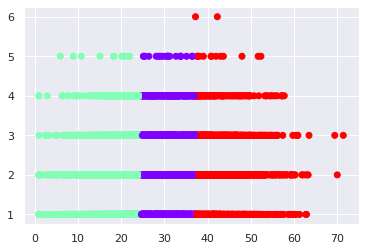

In [95]:
plt.scatter(data_with_clusters['seconds_to_successful_login'],data_with_clusters['total_attempt'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()